## Prevention of Bank Customer Churn: A Predictive and Analysis Model

### 1. Introduction

The main aim of the following study seeks to achieve 2 goals:
1. Identification of which inputs affect and contribute to customer churn in a bank.
2. Building of Predictive Model that classifies the churn status of a bank customer.

In [1]:
# import packages and libraries
import numpy as np
import pandas as pd

# import visualisation packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Dataset Preparation

This section seeks to understand the data structure we have, including  the following tasks:
1. Understanding of input variables used.
2. Preparation of datasets for exploration and prediction purposes.

In [2]:
# importing of main dataset
bank_churn_df=pd.read_csv('Churn_Modelling.csv')
bank_churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print('Based on the following dataset, we note that there are', len(bank_churn_df), 'observations and',len(bank_churn_df.columns),'inputs included.')
print('The next subsequent steps includes the checking of our data for any required data processing and cleaning.')

Based on the following dataset, we note that there are 10000 observations and 14 inputs included.
The next subsequent steps includes the checking of our data for any required data processing and cleaning.


In [4]:
#checking for distinct count of values from bank churn dataset
bank_churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [5]:
print('Therefore, we note that customerID is the primary key count for each observation.')
print('We are also aware that the first 3 attributes are not important key variables in our analysis, and shall therefore be omitted.')

Therefore, we note that customerID is the primary key count for each observation.
We are also aware that the first 3 attributes are not important key variables in our analysis, and shall therefore be omitted.


In [6]:
#dropping of unsuitable variables
bank_churn_df=bank_churn_df.drop(['RowNumber','CustomerId','Surname'],axis=1)
bank_churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# missing values check from bank churn modelling dataset
bank_churn_df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
print('As we can see here, there are',bank_churn_df.isnull().sum().sum(), 'null values we found from the dataset.')
print('No further removal of dirty data is therefore required.')

As we can see here, there are 0 null values we found from the dataset.
No further removal of dirty data is therefore required.


In [9]:
#data type of inputs in bank churn modelling dataset
bank_churn_df.columns.to_series().groupby(bank_churn_df.dtypes).groups

{int64: ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'], float64: ['Balance', 'EstimatedSalary'], object: ['Geography', 'Gender']}

In [10]:
print('Therefore, we note that there are 4 catogorial inputs, with the rest being continuous inputs.')

Therefore, we note that there are 4 catogorial inputs, with the rest being continuous inputs.


### 3. Exploration and Data Analysis

This section seeks to make sense of our dataset, in terms of our main outputs and input variables.

In [11]:
# checking of churned status in bank churn modelling dataset
bank_churn_df.groupby('Exited')['CreditScore'].count()

Exited
0    7963
1    2037
Name: CreditScore, dtype: int64

In [12]:
print('Proportion of customer retained:',bank_churn_df.query('Exited==0')['CreditScore'].count()/(bank_churn_df.query('Exited==0')['CreditScore'].count()+bank_churn_df.query('Exited==1')['CreditScore'].count()))
print('Proportion of customer exited:',bank_churn_df.query('Exited==1')['CreditScore'].count()/(bank_churn_df.query('Exited==0')['CreditScore'].count()+bank_churn_df.query('Exited==1')['CreditScore'].count()))
print('Therefore, there is a total of',round(bank_churn_df.query('Exited==1')['CreditScore'].count()/(bank_churn_df.query('Exited==0')['CreditScore'].count()+bank_churn_df.query('Exited==1')['CreditScore'].count()),3)*100 ,'% of customers that have churned.')

Proportion of customer retained: 0.7963
Proportion of customer exited: 0.2037
Therefore, there is a total of 20.4 % of customers that have churned.


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

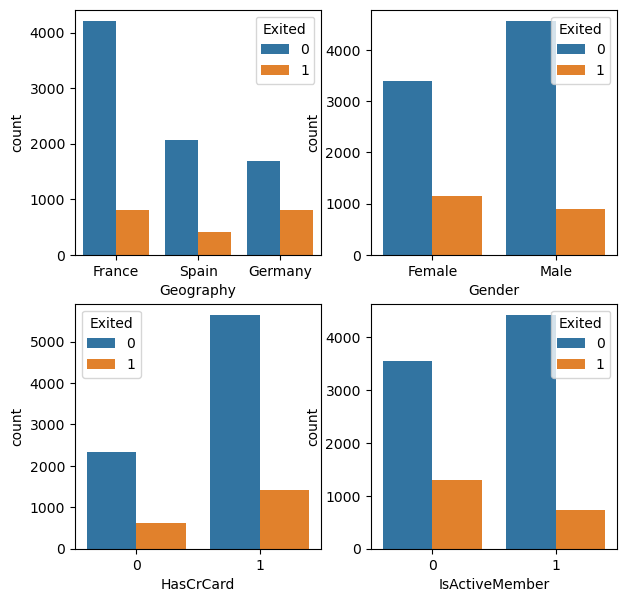

In [13]:
# checking of categorial variables in bank churn modelling dataset
fig, axarr = plt.subplots(2, 2, figsize=(7, 7))
sns.countplot(x='Geography', hue = 'Exited',data = bank_churn_df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = bank_churn_df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = bank_churn_df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = bank_churn_df, ax=axarr[1][1])

In [14]:
print ('Some things to note:')
print('')
print ('Section 1: Geography')
print ('- High Population of bank customers from France in dataset.')
print ('- Inverse Relation of churned customers in small populated areas like Germany.')
print('')
print ('Section 2: Gender')
print ('- Inverse Relation of churned customers in small populated gender like Female.')
print('')
print ('Section 3: Owns Credit Card')
print ('- Inverse Relation of churned customers in for customers owning credit card.')
print('')
print ('Section 4: Being an Active Member')
print ('- Extremely high number of inactive customer base by bank.')
print ('- Proportional Relationship between churned status of customers and inactive customers.')

Some things to note:

Section 1: Geography
- High Population of bank customers from France in dataset.
- Inverse Relation of churned customers in small populated areas like Germany.

Section 2: Gender
- Inverse Relation of churned customers in small populated gender like Female.

Section 3: Owns Credit Card
- Inverse Relation of churned customers in for customers owning credit card.

Section 4: Being an Active Member
- Extremely high number of inactive customer base by bank.
- Proportional Relationship between churned status of customers and inactive customers.


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

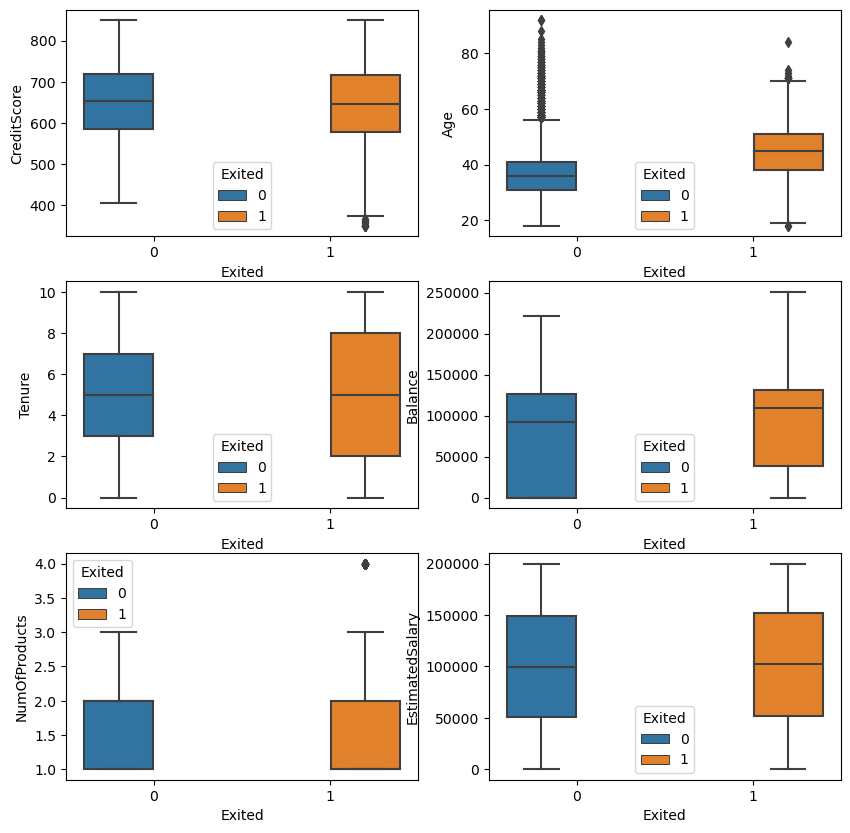

In [15]:
# checking of continuous variables in bank churn modelling dataset
fig, axarr = plt.subplots(3, 2, figsize=(10, 10))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = bank_churn_df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = bank_churn_df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = bank_churn_df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = bank_churn_df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = bank_churn_df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = bank_churn_df, ax=axarr[2][1])

In [16]:
print ('Some things to note:')
print('')
print ('Section 1: Credit Score')
print ('- No significant trends between churned customers and customers that retained.')
print('')
print ('Section 2: Age')
print ('- Older Customers tend to churn more than younger ones.')
print('')
print ('Section 3: Tenure')
print ('- Customers that are further from the average tenure period then to churn more. They either spend too little or too much time in the banks.')
print('')
print ('Section 4: Bank Balance')
print ('- Customers with larger amounts of bank balances are more likely to churn.')
print('')
print ('Section 5: Number of Products')
print ('- No significant trends between churned customers and customers that retained.')
print('')
print ('Section 6: Salary')
print ('- No significant trends between churned customers and customers that retained.')

Some things to note:

Section 1: Credit Score
- No significant trends between churned customers and customers that retained.

Section 2: Age
- Older Customers tend to churn more than younger ones.

Section 3: Tenure
- Customers that are further from the average tenure period then to churn more. They either spend too little or too much time in the banks.

Section 4: Bank Balance
- Customers with larger amounts of bank balances are more likely to churn.

Section 5: Number of Products
- No significant trends between churned customers and customers that retained.

Section 6: Salary
- No significant trends between churned customers and customers that retained.


### 4. Feature Engineering

This section seeks to implement the following:
1. Add features that are likely to have an impact on the probability of churning. 
2. Including train test split approach used for Machine Learning.

(-1.0, 6.0)

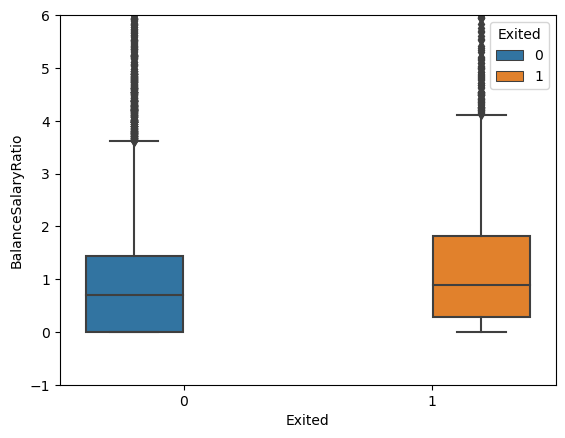

In [17]:
# additional data exploration #1 : Bank Balance VS Salary
bank_churn_df['BalanceSalaryRatio'] = bank_churn_df.Balance/bank_churn_df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = bank_churn_df)
plt.ylim(-1, 6)

In [18]:
print ('Some things to note:')
print ('Even though salary, bank balance have little effect on churn status of customers, % of bank balance over salary shows that higher balance salary ratio are more likely to churn.')

Some things to note:
Even though salary, bank balance have little effect on churn status of customers, % of bank balance over salary shows that higher balance salary ratio are more likely to churn.


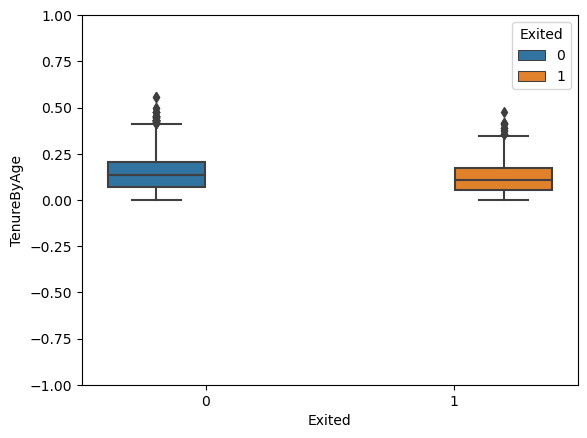

In [19]:
# additional data exploration #2 : Tenure VS Age
bank_churn_df['TenureByAge'] = bank_churn_df.Tenure/(bank_churn_df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = bank_churn_df)
plt.ylim(-1, 1)
plt.show()

In [20]:
print ('Some things to note:')
print ('Tenure is highly correlated with Age, this thus requires some form of normalisation.')

Some things to note:
Tenure is highly correlated with Age, this thus requires some form of normalisation.


In [21]:
# additional data exploration #3 : Credit VS Age
bank_churn_df['CreditScoreGivenAge'] = bank_churn_df.CreditScore/bank_churn_df.Age

In [22]:
print ('Some things to note:')
print ('We will like to take into account the credit behaviour of customers over time, based on their age.')

Some things to note:
We will like to take into account the credit behaviour of customers over time, based on their age.


In [23]:
# train test split 
df_train =bank_churn_df.sample(frac=0.8,random_state=200)
df_test = bank_churn_df.drop(df_train.index)
print('total length of training dataset:',len(df_train))
print('total length of testing dataset:',len(df_test))

total length of training dataset: 8000
total length of testing dataset: 2000


In [24]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


### 5. Data Processing and Preparation

This section seeks to implement the following:
1. Processing of raw data for model fitting purposes.

In [25]:
#changing of order of variables
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [26]:
#implementing one hot encoding for categorical variables

# 2 dummy variables component, credit card
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1

# 2 dummy variables component, active member status
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1

# 2 dummy variables component, gender
df_train['Gender_Female']=np.where(df_train['Gender']=='Female',1,-1)
df_train['Gender_Male']=np.where(df_train['Gender']=='Male',1,-1)

# 3 dummy variables component, geography
df_train['Geography_Spain']=np.where(df_train['Geography']=='Spain',1,-1)
df_train['Geography_France']=np.where(df_train['Geography']=='France',1,-1)
df_train['Geography_Germany']=np.where(df_train['Geography']=='Germany',1,-1)

df_train=df_train.drop(['Geography','Gender'],axis=1)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Gender_Female,Gender_Male,Geography_Spain,Geography_France,Geography_Germany
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,1,-1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,1,-1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,1,-1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,1,-1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,1,-1


In [27]:
# minmax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Gender_Female,Gender_Male,Geography_Spain,Geography_France,Geography_Germany
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,1,-1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,1,-1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,1,-1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,1,-1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,1,-1


### 6. Model Fitting and Selection

This section seeks to implement the following:
1. Fitting of training data into 3 algorithms, namely logisitic, SVM and Random Forest Classifier.
2. Getting the best model from all 3 algorithims best on accuracy score.

In [54]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [29]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

#### Method 1: Logistic Regression

In [30]:
# hyperparameter tuning for logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100,150], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(log_primal_Grid)

0.81525
{'C': 150, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=150, max_iter=250, tol=1e-05)


In [33]:
# fitting best model for logistic regression
log_primal = LogisticRegression(C=150, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

LogisticRegression(C=150, max_iter=250, tol=1e-05)

In [34]:
# getting accuracy rate for logistic regression model
print(classification_report(df_train.Exited, log_primal.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.64      0.24      0.35      1647

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



#### Method 2: SVM

In [35]:
# hyperparameter tuning for SVM model
param_grid = {'C': [0.5,100,150,200], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)

0.8518747609662071
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [36]:
# fitting best model for SVM model
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [37]:
# getting accuracy rate for SVM
print(classification_report(df_train.Exited, SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.85      0.40      0.54      1647

    accuracy                           0.86      8000
   macro avg       0.86      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



#### Method 3: Random Forest Classifier

In [38]:
# hyperparameter tuning for Random Forest Classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8,9], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(RanFor_grid)

0.864625
{'max_depth': 9, 'max_features': 6, 'min_samples_split': 5, 'n_estimators': 50}
RandomForestClassifier(max_depth=9, max_features=6, min_samples_split=5,
                       n_estimators=50)


In [41]:
# fitting best model for Random Forest Classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=9, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=5,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

RandomForestClassifier(max_depth=9, max_features=6, min_samples_split=5,
                       n_estimators=50)

In [42]:
# getting accuracy rate for Random Forest Classifier
print(classification_report(df_train.Exited, RF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6353
           1       0.91      0.56      0.69      1647

    accuracy                           0.90      8000
   macro avg       0.90      0.77      0.81      8000
weighted avg       0.90      0.90      0.89      8000



Based on the metrics used above, I noted that the best model that gives a decent balance of the recall and precision is the random forest, with a precision score on 1's of 0.91, out of all customers that the model thinks will churn, 91% do actually churn and with the recall score of 0.56 on the 1's, the model is able to highlight 56% of all those who churned.

### 7. Testing and Accuracy Score

This section seeks to implement the following:
1. Processing of test data used for prediction purposes.
2. Getting accuracy score from the best fitted model.

In [51]:
#implementing one hot encoding for categorical variables

# 2 dummy variables component, credit card
df_test.loc[df_test.HasCrCard == 0, 'HasCrCard'] = -1

# 2 dummy variables component, active member status
df_test.loc[df_test.IsActiveMember == 0, 'IsActiveMember'] = -1

# 2 dummy variables component, gender
df_test['Gender_Female']=np.where(df_test['Gender']=='Female',1,-1)
df_test['Gender_Male']=np.where(df_test['Gender']=='Male',1,-1)

# 3 dummy variables component, geography
df_test['Geography_Spain']=np.where(df_test['Geography']=='Spain',1,-1)
df_test['Geography_France']=np.where(df_test['Geography']=='France',1,-1)
df_test['Geography_Germany']=np.where(df_test['Geography']=='Germany',1,-1)

df_test=df_test.drop(['Geography','Gender'],axis=1)
df_test.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Gender_Female,Gender_Male,Geography_Spain,Geography_France,Geography_Germany
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,-1,-1,1,-1
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,1,-1,-1,1,-1
5,1,645,44,8,113755.78,2,149756.71,0.759604,0.181818,14.659091,1,-1,-1,1,1,-1,-1
17,0,549,24,9,0.00,2,14406.41,0.000000,0.375000,22.875000,1,1,1,-1,1,-1,-1
18,0,587,45,6,0.00,1,158684.81,0.000000,0.133333,13.044444,-1,-1,-1,1,1,-1,-1


In [52]:
# minMax scaling the continuous variables
minVec = df_test[continuous_vars].min().copy()
maxVec = df_test[continuous_vars].max().copy()
df_test[continuous_vars] = (df_test[continuous_vars]-minVec)/(maxVec-minVec)
df_test.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Gender_Female,Gender_Male,Geography_Spain,Geography_France,Geography_Germany
2,1,0.270440,0.324324,0.8,0.750363,0.666667,0.570039,0.000132,0.400000,0.135061,1,-1,1,-1,-1,1,-1
3,0,0.683438,0.283784,0.1,0.000000,0.333333,0.469437,0.000000,0.053846,0.292387,-1,-1,1,-1,-1,1,-1
5,1,0.570231,0.351351,0.8,0.534621,0.333333,0.749303,0.000072,0.381818,0.206382,1,-1,-1,1,1,-1,-1
17,0,0.368973,0.081081,0.9,0.000000,0.333333,0.072030,0.000000,0.787500,0.422869,1,1,1,-1,1,-1,-1
18,0,0.448637,0.364865,0.6,0.000000,0.000000,0.793978,0.000000,0.280000,0.163837,-1,-1,-1,1,1,-1,-1


In [53]:
# getting accuracy rate for test dataset
print(classification_report(df_test.Exited,  RF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1610
           1       0.72      0.45      0.55       390

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



Based on the metrics used above, the test data shows a relatively high precision on customers that actually churned, but however needs to still work on the recall score, it misses on those that end up churning.